# CREDIT CARD FRAUD DETECTION.

### Context

Credit card companies handle a vast number of transactions every second. However, some transactions may not be initiated by the cardholder but rather by individuals who illegally possess the cardholder's information. These individuals can initiate fraudulent transactions, causing the rightful cardholders to be charged for items they did not purchase. Therefore, it is essential for credit card companies to identify and prevent these fraudulent transactions.

Maintaining minimal to no instances of fraud not only enhances the trust of customers who prefer using cards for their purchases but also attracts new customers to the business. This, in turn, upholds the company's reputation and contributes to revenue growth by reducing customer attrition and drawing in more customers.


### Data Content

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Due to confidentiality issues, original features and more background information about the data cannot not be provided. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, the recommended measure of accuracy is the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

### Problem Statement
_The challenge is to build a machine learning model that accurately identifies fraud while minimizing false positives._

## Table of Contents
* 1. IMPORTING LIBRARIES

* 2. LOADING DATA

* 3. EXPLORATORY DATA ANALYSIS

* 4. DATA VISUALIZATION

* 5. DATA PREPROCESSING

* 6. MODEL TRAINING AND EVALUATION

* 7. FEATURE IMPORTANCE

*  8. VISUALIZATION

* 9. AUC-ROC CURVE

* 10. SUMMARY OF FINDINGS

### 1. IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot
from plotly.subplots import make_subplots


In [2]:
from scipy import stats
from scipy.stats import norm, skew
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

import warnings
warnings.filterwarnings("ignore")

### 2. LOADING THE DATA

In [3]:
filepath = "C:/Users/PC/Documents/Miscellaneous/credit_card_data.csv"
df = pd.read_csv(filepath)

In [4]:
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

### 3. EXPLORATORY DATA ANALYSIS (EDA)

#### Notes;
_This EDA is conducted in order to:_
* i. Identify the feasibility of the project (is it possible to deliver a solution using the data we have?)
* ii. Craft a story (can useful patterns be revealed?)
* iii. Aide the modelling process (are there right signals for the model?)

In [5]:
#data description
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
#checking for missing values in the dataset
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum() / df.shape[0])* 100
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

Time  V16  Amount  V28  V27  V26  V25  V24  V23  V22  ...  V10   V9  \
Total     0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
Percent   0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   

          V8   V7   V6   V5   V4   V3   V2  Class  
Total    0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0  
Percent  0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0  

[2 rows x 31 columns]

#### Notes;
* There are no missing data in the dataset.

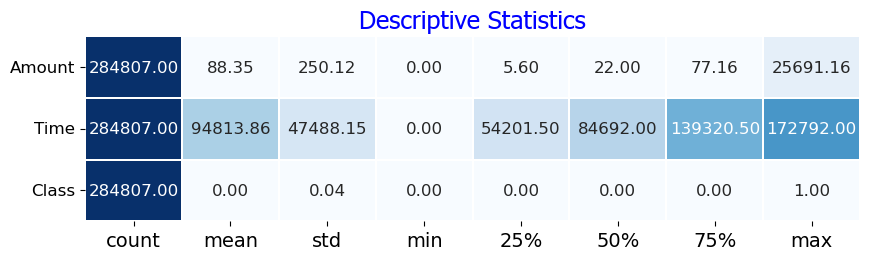

In [7]:
#summary statistics
cols = df[["Amount", "Time", "Class"]]
cmap1 = 'Blues'

def statistical_sum(dataframe):
    stats = dataframe.describe().transpose()
    f, ax = plt.subplots(figsize=(10,
                                 stats.shape[0]*0.8))
    sns.heatmap(stats,
               annot = True,
               cmap = cmap1,
               fmt = '.2f',
               ax = ax,
               linecolor = 'white',
               linewidths = 1.2,
               cbar = False,
               annot_kws = {"size": 12})
    plt.xticks(size = 14)
    plt.yticks(size = 12,
              rotation = 0)
    plt.title("Descriptive Statistics", font='tahoma', fontsize = 18,
             color = 'blue')
    
statistical_sum(cols)

In [8]:
#correlation matrix
cm = df.corr()
cm.style.background_gradient(cmap='summer')

##### Checking for Class Imbalance

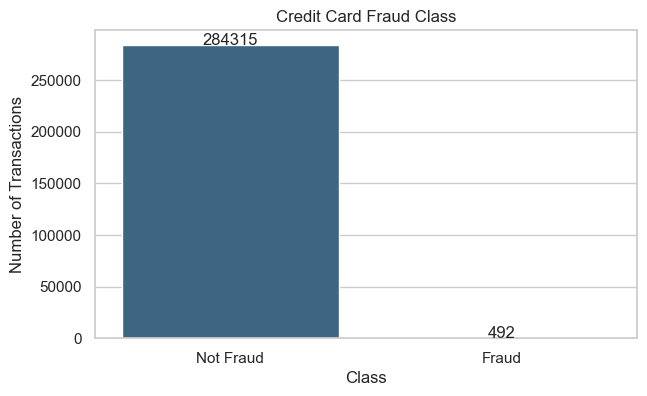

In [9]:
#check for class imbalance
plt.figure(figsize=(7, 4))
sns.set(style="whitegrid")
ax = sns.countplot(x="Class", data=df, palette="viridis")

# Add count labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=12)

# Label the x-axis
ax.set(xticklabels=["Not Fraud", "Fraud"])
ax.set(xlabel="Class", ylabel="Number of Transactions", title="Credit Card Fraud Class");


In [10]:
#creating a new feature, 'Hour' from time
df['Hour'] = df['Time'].apply(lambda x: np.ceil(float(x) / 3600 % 24))
df['Hour'] = df['Hour'].astype('int')

### 4. DATA VISUALIZATION

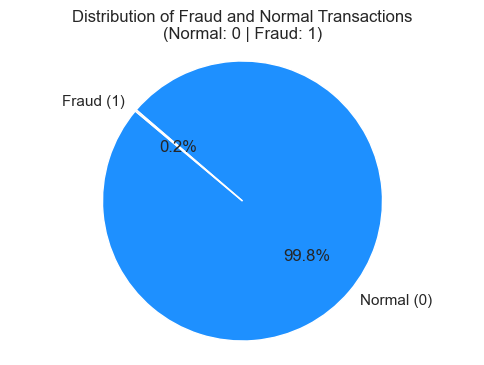

In [11]:
#distribution of fraud and normal transactions
class_counts = df['Class'].value_counts()
labels = ['Normal (0)', 'Fraud (1)']
sizes = class_counts.values

# Set color palette
colors = ['#1E90FF', '#FF4500']

# Create a pie chart
plt.figure(figsize=(6, 4))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Fraud and Normal Transactions\n(Normal: 0 | Fraud: 1)', fontsize=12)
plt.axis('equal');

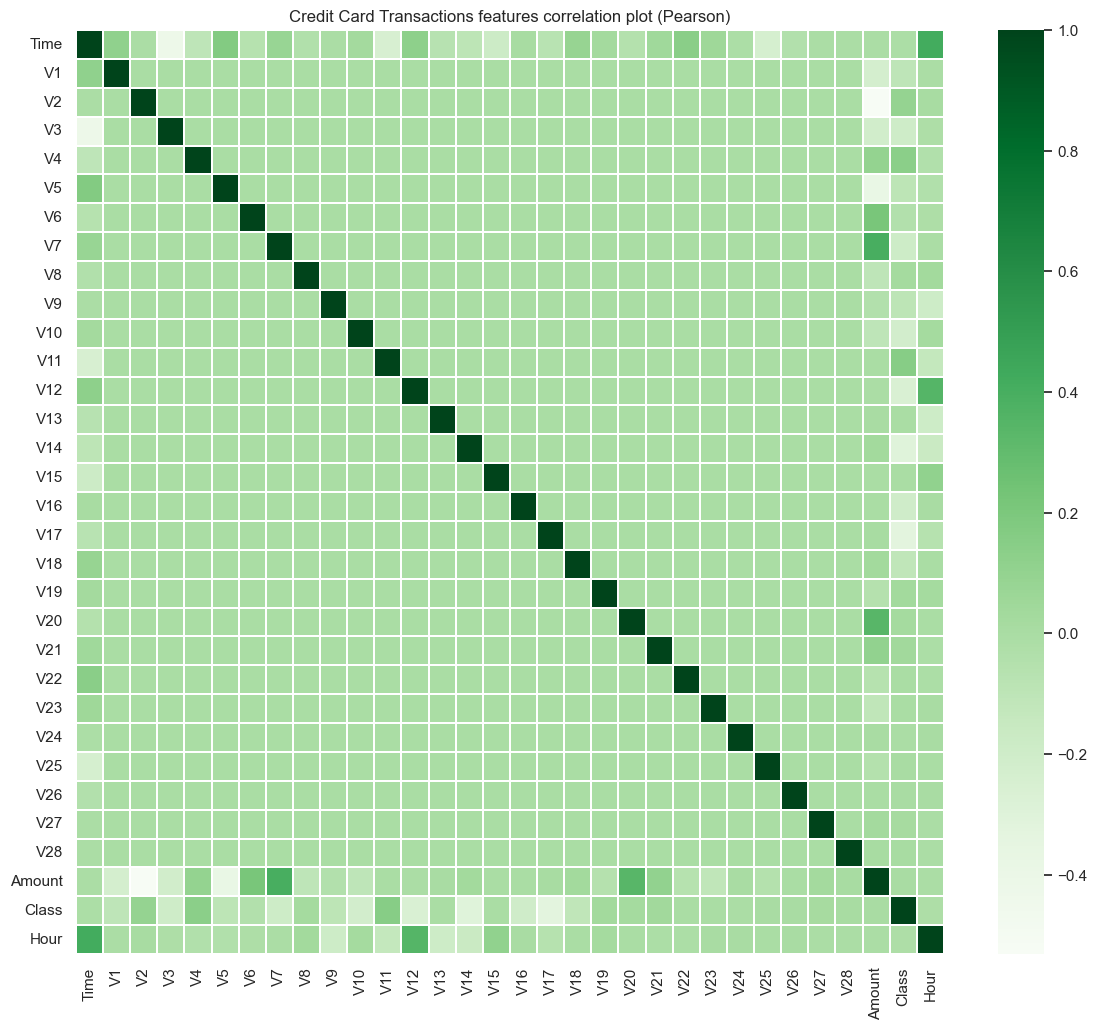

In [12]:
#correlation heatmap
cm = df.corr()
tcm = cm.index

plt.figure(figsize=(14,12))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
sns.heatmap(df[tcm].corr(),linewidths=.1,cmap="Greens");

#### A Plot showing Transaction Type against Time.

In [13]:
#transaction count with non frauds over time(Hour)
count_0 = df[df['Class']==0].groupby('Hour').count()["Class"]

#transaction count with frauds over time(Hour)
count_1 = df[df['Class']==1].groupby('Hour').count()["Class"]

#concatenate
counts_df = pd.concat([count_0, count_1], axis=1, keys=["Class 0", "Class 1"]).fillna(0)
df_counts = counts_df.reset_index()


#subplots
fig = make_subplots(
    rows=1, cols=2,

    subplot_titles=("Non Frauds","Frauds"))
fig.add_trace(go.Scatter(x=df_counts["Hour"], y=df_counts["Class 0"], name="Transactions", marker = {'color' : "#1E90FF"}),
                 row=1, col=1)

fig.add_trace(go.Scatter(x=df_counts["Hour"], y=df_counts["Class 1"], name="Transactions", marker = {'color' : "#FF4500"}),
                 row=1, col=2)

fig['layout']['xaxis']['title']='Hour'
fig['layout']['yaxis']['title']='Transaction'
fig['layout']['xaxis2']['title']='Hour'
fig['layout']['yaxis2']['title']='Transaction'

fig.show()


### 5. DATA PREPROCESSING

In [14]:
X=df.drop(["Class"],axis=1).values
y=df["Class"].values

#split data into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [15]:
#standardizing the data
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### 6. MODEL TRAINING AND EVALUATION

In [16]:
#model building
knn=KNeighborsClassifier()
svc=SVC()
nb=GaussianNB()
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
xgb=XGBClassifier()
lgb=LGBMClassifier()
gbc=GradientBoostingClassifier()
abc=AdaBoostClassifier()
lr=LogisticRegression()

models = [knn, svc, nb, dtc, rfc, xgb, lgb, gbc, abc, lr]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(type(model).__name__, "Model Test Accuracy Score is: ", accuracy_score(y_test, y_pred))
    print(type(model).__name__, "Model Test F1 Score is: ", f1_score(y_test, y_pred))
    print(type(model).__name__,"Mean_absolute_error: ",mean_absolute_error(y_test, y_pred))
    print(type(model).__name__,"Mean_squared_error: ",mean_squared_error(y_test, y_pred))
    print(type(model).__name__,"Root_mean_squared_error: ",np.sqrt(mean_squared_error(y_test, y_pred)))
    print(type(model).__name__,"R2_score: ",r2_score(y_test, y_pred))
    print(type(model).__name__,"Classification_report: \n",classification_report(y_test, y_pred))
    fig=px.imshow(confusion_matrix(y_test, y_pred),color_continuous_scale="Viridis",title=type(model).__name__,
                  width=400,height=400,labels=dict(x="Predicted", y="Actual", color="Counts"),template="plotly_dark")
    fig.show()

KNeighborsClassifier Model Test Accuracy Score is:  0.9995084442259752
KNeighborsClassifier Model Test F1 Score is:  0.8426966292134831
KNeighborsClassifier Mean_absolute_error:  0.0004915557740247885
KNeighborsClassifier Mean_squared_error:  0.0004915557740247885
KNeighborsClassifier Root_mean_squared_error:  0.02217105712465665
KNeighborsClassifier R2_score:  0.7137933113594341
KNeighborsClassifier Classification_report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.77      0.84        98

    accuracy                           1.00     56962
   macro avg       0.97      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962



SVC Model Test Accuracy Score is:  0.9993153330290369
SVC Model Test F1 Score is:  0.7577639751552796
SVC Mean_absolute_error:  0.0006846669709630982
SVC Mean_squared_error:  0.0006846669709630982
SVC Root_mean_squared_error:  0.026166141690419285
SVC R2_score:  0.6013549693934976
SVC Classification_report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.62      0.76        98

    accuracy                           1.00     56962
   macro avg       0.98      0.81      0.88     56962
weighted avg       1.00      1.00      1.00     56962



GaussianNB Model Test Accuracy Score is:  0.9778624346055265
GaussianNB Model Test F1 Score is:  0.11259676284306827
GaussianNB Mean_absolute_error:  0.022137565394473507
GaussianNB Mean_squared_error:  0.022137565394473507
GaussianNB Root_mean_squared_error:  0.14878697992255072
GaussianNB R2_score:  -11.889522656276911
GaussianNB Classification_report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.82      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.90      0.55     56962
weighted avg       1.00      0.98      0.99     56962



DecisionTreeClassifier Model Test Accuracy Score is:  0.9991046662687406
DecisionTreeClassifier Model Test F1 Score is:  0.7582938388625592
DecisionTreeClassifier Mean_absolute_error:  0.0008953337312594361
DecisionTreeClassifier Mean_squared_error:  0.0008953337312594361
DecisionTreeClassifier Root_mean_squared_error:  0.02992212778629615
DecisionTreeClassifier R2_score:  0.4786949599761122
DecisionTreeClassifier Classification_report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.71      0.82      0.76        98

    accuracy                           1.00     56962
   macro avg       0.85      0.91      0.88     56962
weighted avg       1.00      1.00      1.00     56962



RandomForestClassifier Model Test Accuracy Score is:  0.9995435553526912
RandomForestClassifier Model Test F1 Score is:  0.8505747126436782
RandomForestClassifier Mean_absolute_error:  0.00045644464730873214
RandomForestClassifier Mean_squared_error:  0.00045644464730873214
RandomForestClassifier Root_mean_squared_error:  0.021364565226297774
RandomForestClassifier R2_score:  0.7342366462623318
RandomForestClassifier Classification_report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.76      0.85        98

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962



XGBClassifier Model Test Accuracy Score is:  0.9996313331694814
XGBClassifier Model Test F1 Score is:  0.8813559322033897
XGBClassifier Mean_absolute_error:  0.0003686668305185913
XGBClassifier Mean_squared_error:  0.0003686668305185913
XGBClassifier Root_mean_squared_error:  0.01920069869870863
XGBClassifier R2_score:  0.7853449835195756
XGBClassifier Classification_report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.99      0.80      0.88        98

    accuracy                           1.00     56962
   macro avg       0.99      0.90      0.94     56962
weighted avg       1.00      1.00      1.00     56962



[LightGBM] [Info] Number of positive: 394, number of negative: 227451
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.047800 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7675
[LightGBM] [Info] Number of data points in the train set: 227845, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001729 -> initscore=-6.358339
[LightGBM] [Info] Start training from score -6.358339
LGBMClassifier Model Test Accuracy Score is:  0.9963308872581721
LGBMClassifier Model Test F1 Score is:  0.33650793650793653
LGBMClassifier Mean_absolute_error:  0.003669112741827885
LGBMClassifier Mean_squared_error:  0.003669112741827885
LGBMClassifier Root_mean_squared_error:  0.06057320151542169
LGBMClassifier R2_score:  -1.1363284973527952
LGBMClassifier Classification_report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
       

GradientBoostingClassifier Model Test Accuracy Score is:  0.9989466661985184
GradientBoostingClassifier Model Test F1 Score is:  0.6629213483146067
GradientBoostingClassifier Mean_absolute_error:  0.0010533338014816894
GradientBoostingClassifier Mean_squared_error:  0.0010533338014816894
GradientBoostingClassifier Root_mean_squared_error:  0.032455104397947784
GradientBoostingClassifier R2_score:  0.38669995291307313
GradientBoostingClassifier Classification_report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.74      0.60      0.66        98

    accuracy                           1.00     56962
   macro avg       0.87      0.80      0.83     56962
weighted avg       1.00      1.00      1.00     56962



AdaBoostClassifier Model Test Accuracy Score is:  0.9991222218320986
AdaBoostClassifier Model Test F1 Score is:  0.7126436781609196
AdaBoostClassifier Mean_absolute_error:  0.0008777781679014079
AdaBoostClassifier Mean_squared_error:  0.0008777781679014079
AdaBoostClassifier Root_mean_squared_error:  0.029627321308235206
AdaBoostClassifier R2_score:  0.4889166274275609
AdaBoostClassifier Classification_report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.63      0.71        98

    accuracy                           1.00     56962
   macro avg       0.91      0.82      0.86     56962
weighted avg       1.00      1.00      1.00     56962



LogisticRegression Model Test Accuracy Score is:  0.9991222218320986
LogisticRegression Model Test F1 Score is:  0.6951219512195121
LogisticRegression Mean_absolute_error:  0.0008777781679014079
LogisticRegression Mean_squared_error:  0.0008777781679014079
LogisticRegression Root_mean_squared_error:  0.029627321308235206
LogisticRegression R2_score:  0.4889166274275609
LogisticRegression Classification_report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.58      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962



In [17]:
#comapring model accuracy for all models   

models = [knn, svc, nb, dtc, rfc, xgb, lgb, gbc, abc, lr]

fig=px.bar(x=[type(model).__name__ for model in models], y=[accuracy_score(y_test, model.predict(X_test)) for model in models],
         color=[accuracy_score(y_test, model.predict(X_test)) for model in models], color_continuous_scale="Viridis",
            title="Model Comparison", labels=dict(x="Model", y="Accuracy"), template="plotly_dark", width=800,
            height=600,text=[accuracy_score(y_test, model.predict(X_test)) for model in models])
#fig.update_layout(yaxis_range=[0.97,0.99]) 
fig.show()

### 7. FEATURE IMPORTANCE

RandomForestClassifier Model Feature Importance: 

XGBClassifier Model Feature Importance: 

LGBMClassifier Model Feature Importance: 

GradientBoostingClassifier Model Feature Importance: 

DecisionTreeClassifier Model Feature Importance: 



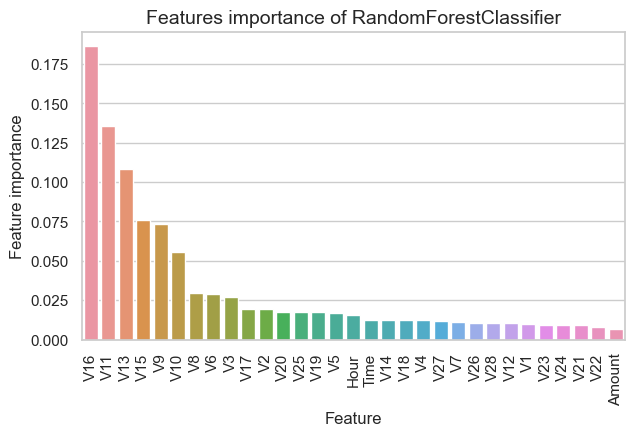

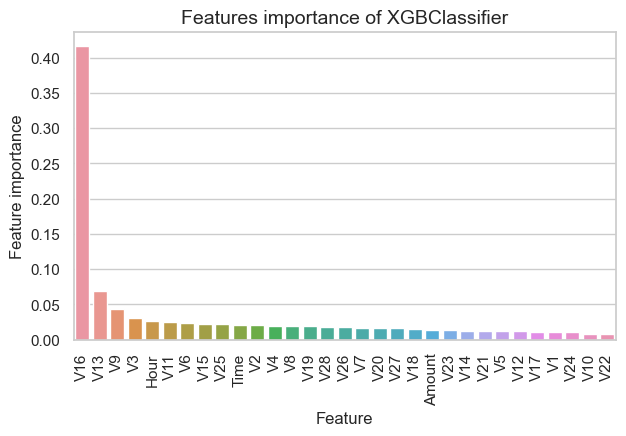

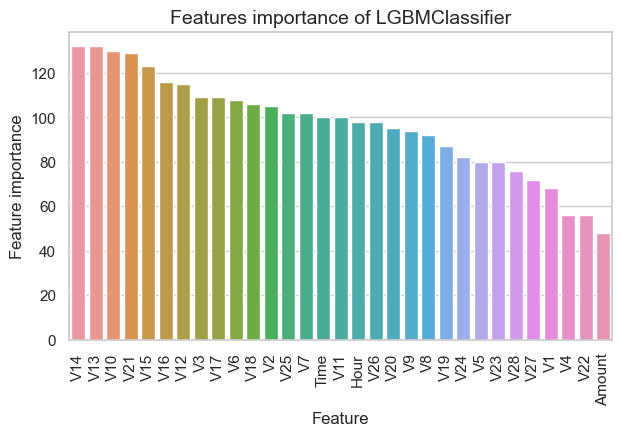

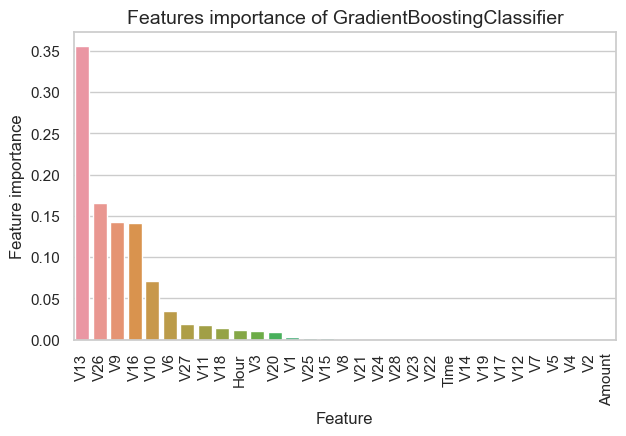

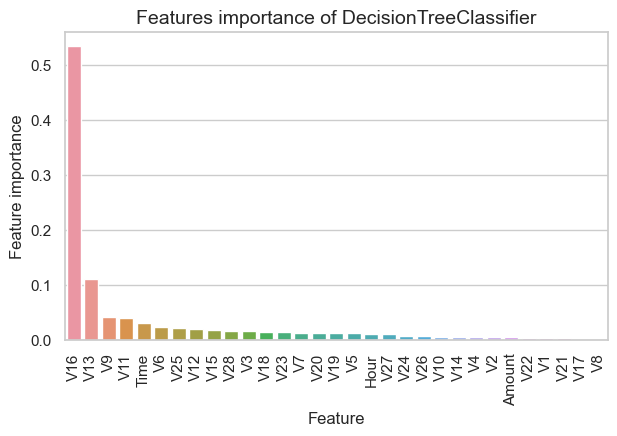

In [18]:
models = [rfc, xgb, lgb, gbc,svc,dtc, lr]

target = 'Class'
predictors = ['Time',"Hour", 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount']

for model in models:
    # there is no feature importance attribute in SVC and Logistic regression
    if model == svc or model == lr:
           continue
    print(type(model).__name__, "Model Feature Importance: \n")
    tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': model.feature_importances_})
    tmp = tmp.sort_values(by='Feature importance',ascending=False)
    plt.figure(figsize = (7,4))
    plt.title('Features importance of '+type(model).__name__,fontsize=14)
    s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
    s.set_xticklabels(s.get_xticklabels(),rotation=90);

### 8. PCA

Text(0.5, 1.0, 'PCA: 2 Component')

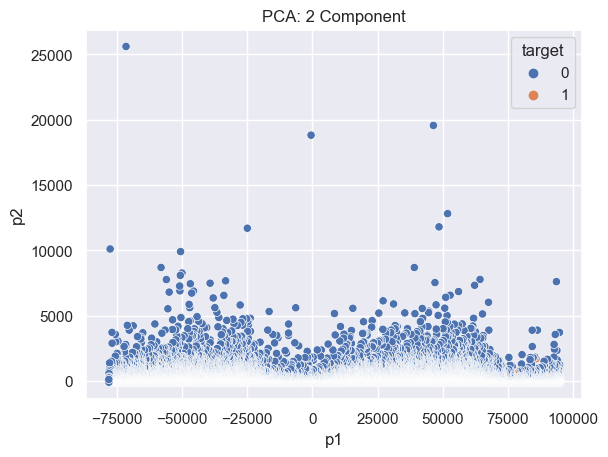

In [19]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
X_reduced=pca.fit_transform(X)

#visualization of reduced data:
sns.set_style("darkgrid")
pca_data=pd.DataFrame(X_reduced,columns=["p1","p2"])
pca_data["target"]=y
sns.scatterplot(x="p1",y="p2",hue="target",data=pca_data)
plt.title("PCA: 2 Component")

### 9. AUC-ROC CURVE

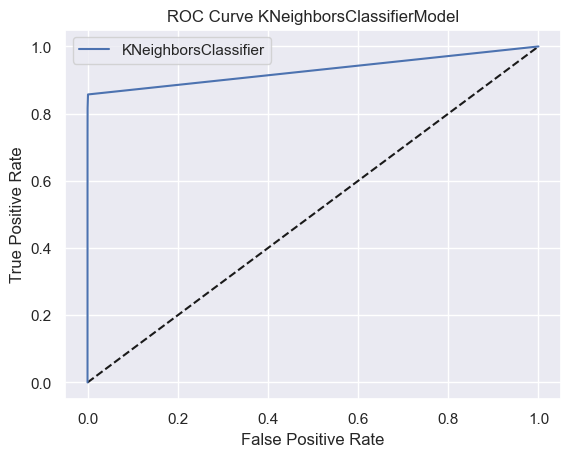

KNeighborsClassifier Model AUC Score is:  0.9284561337900382


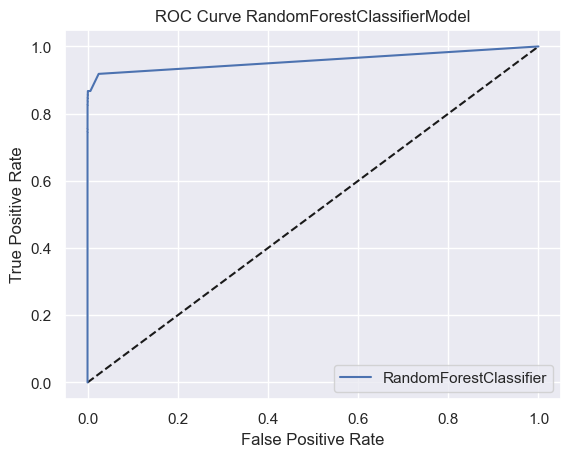

RandomForestClassifier Model AUC Score is:  0.9573680274022945


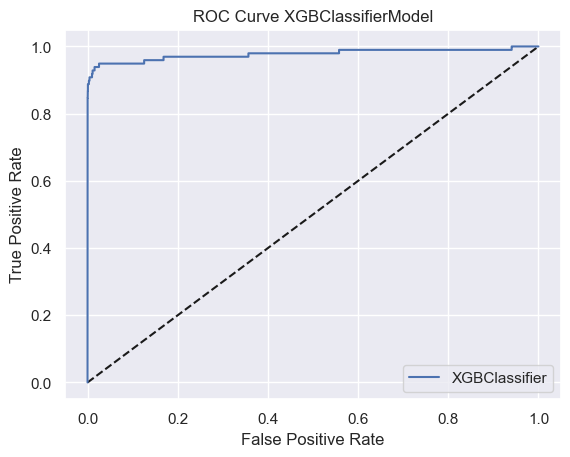

XGBClassifier Model AUC Score is:  0.9773272139469181


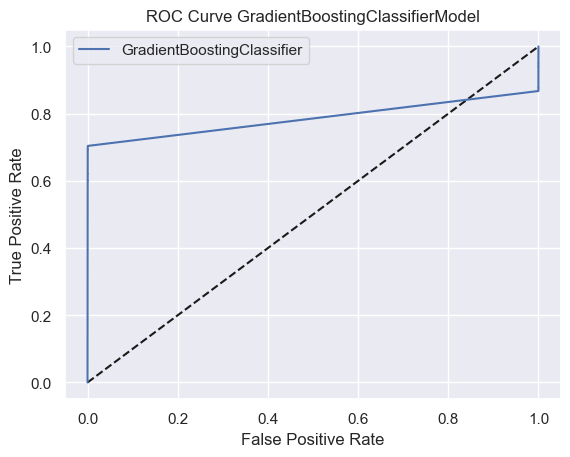

GradientBoostingClassifier Model AUC Score is:  0.7855107029446556


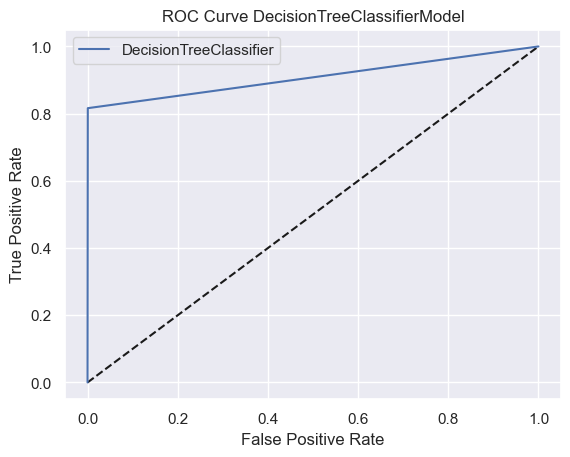

DecisionTreeClassifier Model AUC Score is:  0.907873099295993


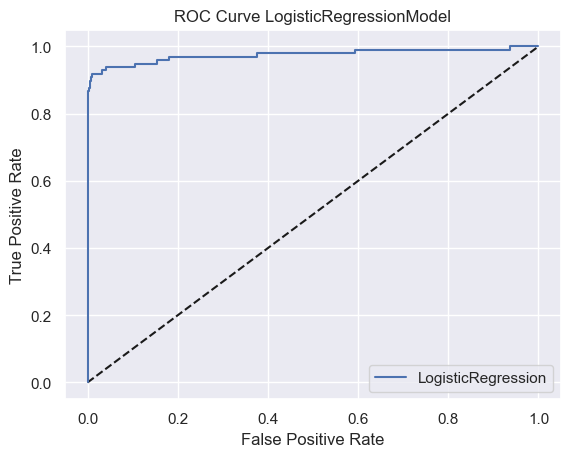

LogisticRegression Model AUC Score is:  0.9748659171040391


In [20]:
from sklearn.metrics import roc_curve, auc

models = [knn, rfc, xgb, gbc, dtc, lr]

for model in models:
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.plot([0, 1], [0, 1], "k--")
    plt.plot(fpr, tpr, label=type(model).__name__)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve "+type(model).__name__+"Model")
    plt.legend()
    plt.show()
    print(type(model).__name__, "Model AUC Score is: ", auc(fpr, tpr))

## SUMMARY OF FINDINGS

After conducting this project on credit card fraud detection, several important insights and conclusions have emerged:

**1. Data and Problem Statement:**
   - The dataset used for this project contains credit card transactions, with a highly imbalanced distribution of fraud and non-fraud transactions.
   - The problem statement revolves around building a machine learning model that accurately identifies fraud while minimizing false positives.

**2. Exploratory Data Analysis (EDA):**
   - The EDA revealed that there were no missing values in the dataset.
   - Summary statistics, correlation matrices, and visualization techniques provided insights into data characteristics, including the distribution of features and the class imbalance issue.

**3. Model Training and Evaluation:**
   - Ten different machine learning models were evaluated for their performance in classifying credit card transactions as fraud or non-fraud.
   - Key evaluation metrics included accuracy, F1 score, mean absolute error, mean squared error, root mean squared error, R-squared score, and classification reports.
   - The Random Forest Classifier, XGBoost Classifier, and LightGBM Classifier showed the highest accuracy and F1 scores among the models.

**4. Feature Importance:**
   - Feature importance analysis was conducted for models that support this feature (Random Forest, XGBoost, LightGBM, Gradient Boosting).
   - Feature importance helped identify which features had the most significant impact on the model's predictions.

**5. PCA (Principal Component Analysis):**
   - PCA was applied to reduce the dimensionality of the data to two components for visualization purposes. It didn't significantly impact model performance but allowed for better data visualization.

**6. AUC-ROC Curve:**
   - AUC-ROC curves were used to evaluate the models' performance in distinguishing between fraud and non-fraud transactions. AUC scores were calculated to quantify model performance.
   - The models generally showed good discrimination between the two classes, with AUC scores ranging from moderate to high.

### **_CONCLUSION_**

The project successfully addressed the challenge of credit card fraud detection using machine learning. The Random Forest Classifier, XGBoost Classifier, and LightGBM Classifier were identified as top-performing models. The best results were obtained with XGBoost, with an AUC score of 0.97 and a accuracy of 0.9996.

It's important to note that dealing with imbalanced data remains a challenge, and further refinements, such as sampling techniques or additional feature engineering, could enhance model performance. Overall, this project contributes to the ongoing efforts to protect customers and financial institutions from fraudulent transactions, ensuring a safer and more secure financial environment.